<a href="https://colab.research.google.com/github/KNS-Karthik/AITTA/blob/main/Unit_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
#Verify the file is copied to current directory
!ls -l

Mounted at /content/drive
total 108
drwx------ 6 root root   4096 Mar 11 15:26  drive
drwxr-xr-x 1 root root   4096 Mar  7 14:26  sample_data
-rw-r--r-- 1 root root 102008 Mar 11 15:23 'Week1_Exercise 1a Linear Regression.ipynb'


#1(a) Linear Regression

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [ ]:
# Load the data
data = pd.read_csv('/content/drive/MyDrive/Dataset/Week1_Ex1.txt', header=None, names=['Population', 'Profit'])

# Display the first few rows of the dataset
print(data.head())

   Population   Profit
0      6.1101  17.5920
1      5.5277   9.1302
2      8.5186  13.6620
3      7.0032  11.8540
4      5.8598   6.8233


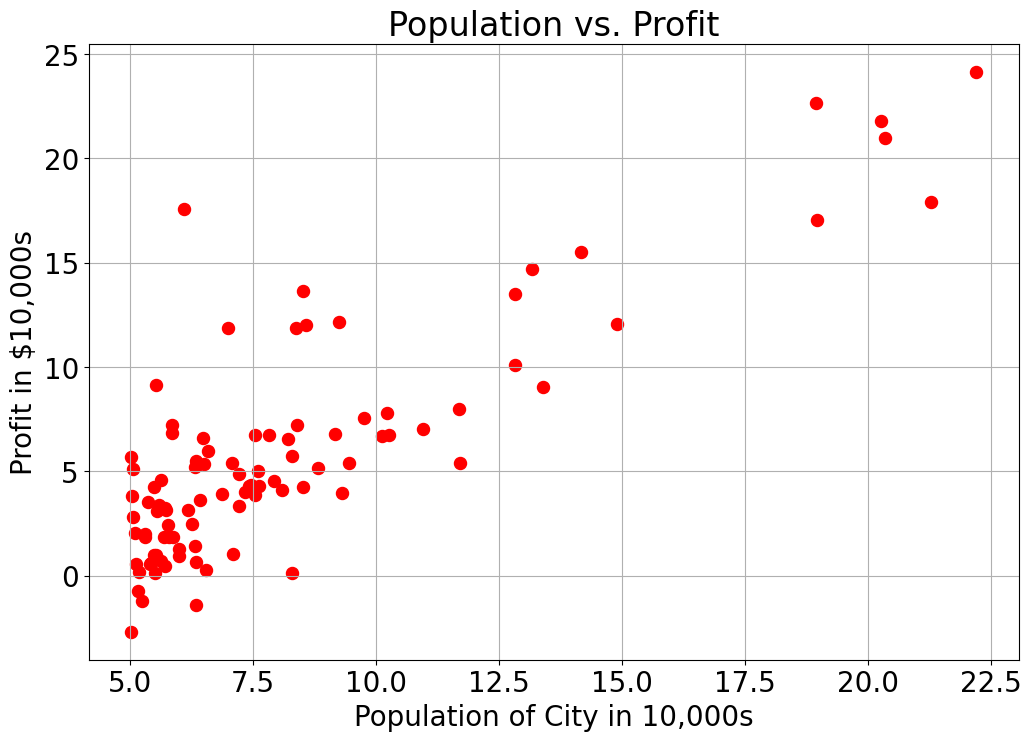

In [ ]:
# Set the size of the plot
plt.figure(figsize=(12, 8))  # Width=12 inches, Height=8 inches

# Set common font size
common_font_size = 20

plt.rcParams['font.size'] = common_font_size

# Visualize the data
plt.scatter(data['Population'], data['Profit'], color='red', marker='o',s=75)
plt.title('Population vs. Profit',fontsize=common_font_size + 4)
plt.xlabel('Population of City in 10,000s', fontsize=common_font_size)
plt.ylabel('Profit in $10,000s', fontsize=common_font_size)
plt.grid(True)
plt.savefig('populationVSProfit.jpeg', bbox_inches='tight',dpi=600)
plt.show()


Coefficient (Slope): 1.287528758766657
Intercept: -4.732397595806334
Mean absolute error: 2.48
Mean squared error: 15.71
Root mean squared error: 3.96
Coefficient of determination (R²): 0.50


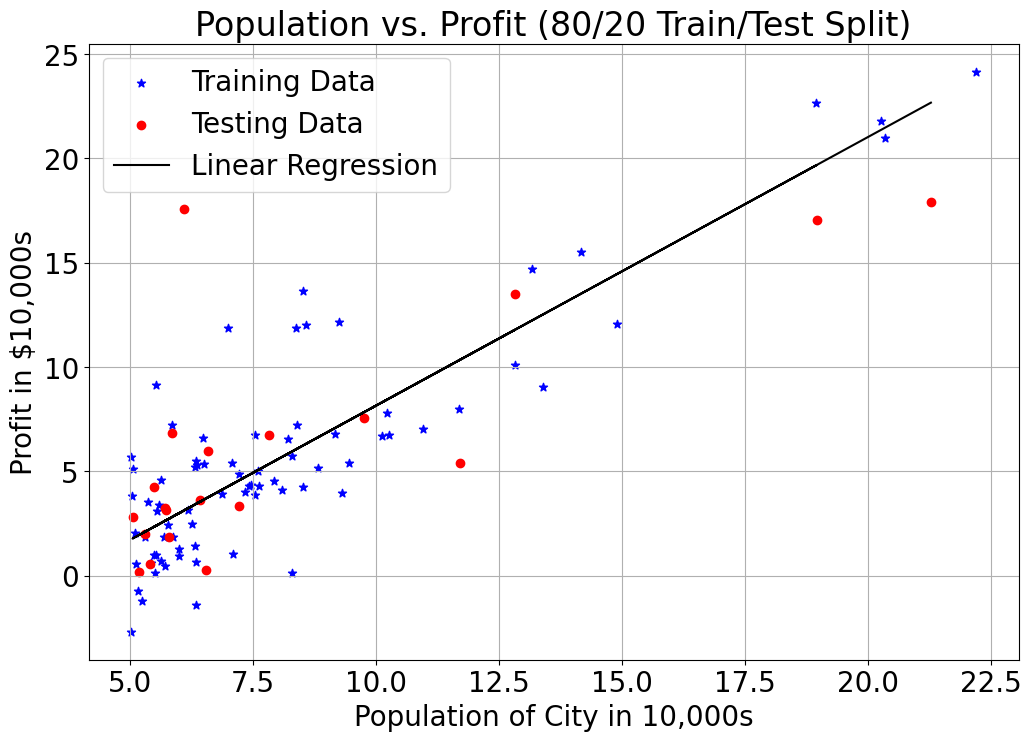

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data
data = pd.read_csv('/content/drive/MyDrive/Dataset/Week1_Ex1.txt', header=None, names=['Population', 'Profit'])

# Prepare the data
X = data['Population'].values.reshape(-1, 1)
y = data['Profit'].values

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Create linear regression object
model = LinearRegression()

# Train the model using the training sets
model.fit(X_train, y_train)

# Make predictions using the testing set
y_pred_test = model.predict(X_test)

# Print the coefficients
print('Coefficient (Slope):', model.coef_[0])
print('Intercept:', model.intercept_)

# The mean absolute error
print('Mean absolute error: %.2f' % mean_absolute_error(y_test, y_pred_test))
# The mean squared error
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred_test))
# The root mean squared error
print('Root mean squared error: %.2f' % np.sqrt(mean_squared_error(y_test, y_pred_test)))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination (R²): %.2f' % r2_score(y_test, y_pred_test))

# Plot outputs
plt.figure(figsize=(12, 8))  # Set figure size
plt.scatter(X_train, y_train, color='blue', marker='*', label='Training Data')  # Training data points
plt.scatter(X_test, y_test, color='red', marker='o', label='Testing Data')  # Testing data points
plt.plot(X_test, y_pred_test, color='black', label='Linear Regression')  # Regression line
plt.title('Population vs. Profit (80/20 Train/Test Split)', fontsize=common_font_size + 4)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.legend()
plt.grid(True)
plt.savefig('LR Model.jpeg', bbox_inches='tight',dpi=600)
plt.show()

In [ ]:
# Function to predict profit based on population
def predict_profit(new_population):
    new_population = np.array(new_population).reshape(-1, 1)
    profit = model.predict(new_population)
    return profit.item()  # Use item() to extract a single value.

# Get user input for a new population size
new_population_size = float(input("Enter the population size (in 10,000s) for which you want to predict the profit: "))

# Predict profit for the input population size
predicted_profit = predict_profit(new_population_size)
print(f"Predicted profit for a city with population {new_population_size * 10_000} is ${predicted_profit * 10_000:.2f}")

Enter the population size (in 10,000s) for which you want to predict the profit: 5
Predicted profit for a city with population 50000.0 is $17052.46


#2(b) Logistic Regression

First few rows of the dataset:
   Exam_Score1  Exam_Score2  Admission
0    34.623660    78.024693          0
1    30.286711    43.894998          0
2    35.847409    72.902198          0
3    60.182599    86.308552          1
4    79.032736    75.344376          1

Descriptive statistics of the dataset:
       Exam_Score1  Exam_Score2   Admission
count   100.000000   100.000000  100.000000
mean     65.644274    66.221998    0.600000
std      19.458222    18.582783    0.492366
min      30.058822    30.603263    0.000000
25%      50.919511    48.179205    0.000000
50%      67.032988    67.682381    1.000000
75%      80.212529    79.360605    1.000000
max      99.827858    98.869436    1.000000


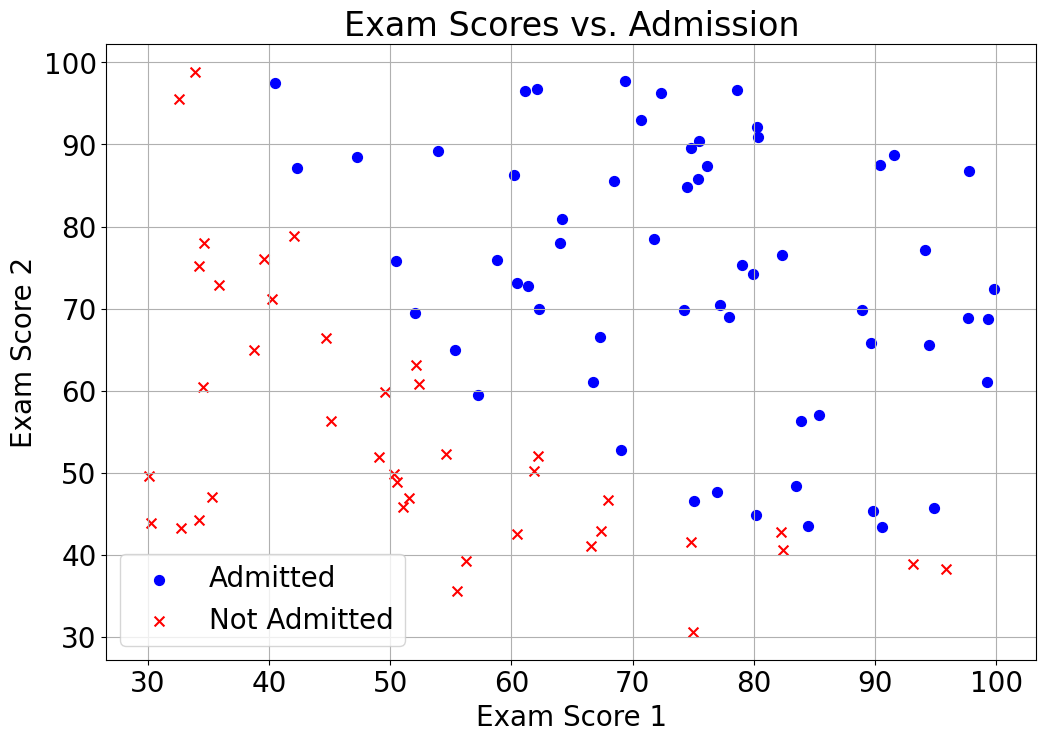

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('/content/drive/MyDrive/Dataset/Week1_Ex2.txt', header=None, names=['Exam_Score1', 'Exam_Score2', 'Admission'])

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())

# Set common font size
common_font_size = 20

# Display descriptive statistics
print("\nDescriptive statistics of the dataset:")
data_description = data.describe()
print(data_description)

# Visualize the data
admitted = data[data['Admission'] == 1]
not_admitted = data[data['Admission'] == 0]

plt.figure(figsize=(12, 8))
plt.scatter(admitted['Exam_Score1'], admitted['Exam_Score2'], s=50, c='b', marker='o', label='Admitted')
plt.scatter(not_admitted['Exam_Score1'], not_admitted['Exam_Score2'], s=50, c='r', marker='x', label='Not Admitted')
plt.title('Exam Scores vs. Admission', fontsize=common_font_size + 4)
plt.xlabel('Exam Score 1',fontsize=common_font_size)
plt.ylabel('Exam Score 2',fontsize=common_font_size)
plt.xticks(fontsize=common_font_size)
plt.yticks(fontsize=common_font_size)
plt.legend(fontsize=common_font_size)
plt.grid(True)
plt.savefig('ExamVSadmission.jpeg', bbox_inches='tight',dpi=600)
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score
import pandas as pd
import numpy as np

# Load the data
data = pd.read_csv('/content/drive/MyDrive/Dataset/Week1_Ex2.txt', header=None, names=['Exam_Score1', 'Exam_Score2', 'Admission'])

# Prepare the data
X = data[['Exam_Score1', 'Exam_Score2']]
y = data['Admission']

# Create logistic regression object
log_reg = LogisticRegression()

# Perform 10-fold cross-validation
cv_scores = cross_val_score(log_reg, X, y, cv=10, scoring='accuracy')

# Print the mean and standard deviation of the cross-validated accuracy
print(f"CV Accuracy: {np.mean(cv_scores):.2f} (+/- {np.std(cv_scores) * 2:.2f})")

# Split the data into training and testing sets (optional, if you want to show the metrics on a holdout test set)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Train the model using the training set
log_reg.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = log_reg.predict(X_test)

# Classification metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Precision, Recall, and F1-score
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

# Optional: Calculate the accuracy on the test set
accuracy = np.mean(y_pred == y_test)
print(f"Test Set Accuracy: {accuracy:.2f}")

CV Accuracy: 0.89 (+/- 0.11)

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.88      0.78         8
           1       0.90      0.75      0.82        12

    accuracy                           0.80        20
   macro avg       0.80      0.81      0.80        20
weighted avg       0.82      0.80      0.80        20

Confusion Matrix:
[[7 1]
 [3 9]]
Precision: 0.90
Recall: 0.75
F1-score: 0.82
Test Set Accuracy: 0.80


In [ ]:
# Function to predict the probability of admission based on exam scores
def predict_admission_probability(exam_score1, exam_score2):
    exam_scores = np.array([exam_score1, exam_score2]).reshape(1, -1)
    prob = log_reg.predict_proba(exam_scores)
    return prob[0]

# Get user input for exam scores
exam_score1 = float(input("Enter Exam Score 1: "))
exam_score2 = float(input("Enter Exam Score 2: "))

# Predict and display the probability of admission
probabilities = predict_admission_probability(exam_score1, exam_score2)
print(f"Probability of Being Admitted: {probabilities[1]:.2f}")
print(f"Probability of Not Being Admitted: {probabilities[0]:.2f}")

Enter Exam Score 1: 11
Enter Exam Score 2: 11
Probability of Being Admitted: 0.00
Probability of Not Being Admitted: 1.00


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


#1(c) K-Means Clustering

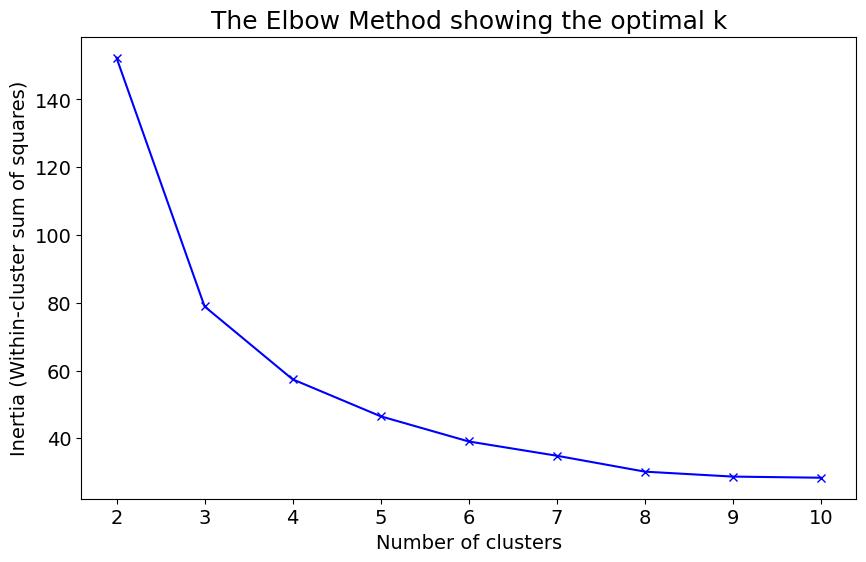

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('/content/drive/MyDrive/Dataset/Week1_Ex3.csv')

# Set common font size
common_font_size = 14

# Determine the optimal number of clusters using the Elbow method
inertia = []
silhouette_scores = []
K = range(2, 11)  # Test different numbers of clusters, here from 2 to 10

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data, kmeans.labels_))

# Plot the Elbow graph
plt.figure(figsize=(10, 6))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of clusters',fontsize=common_font_size)
plt.ylabel('Inertia (Within-cluster sum of squares)',fontsize=common_font_size)
plt.xticks(fontsize=common_font_size)
plt.yticks(fontsize=common_font_size)
plt.title('The Elbow Method showing the optimal k',fontsize=common_font_size + 4)
plt.savefig('Elbow.jpeg', bbox_inches='tight',dpi=600)
plt.show()

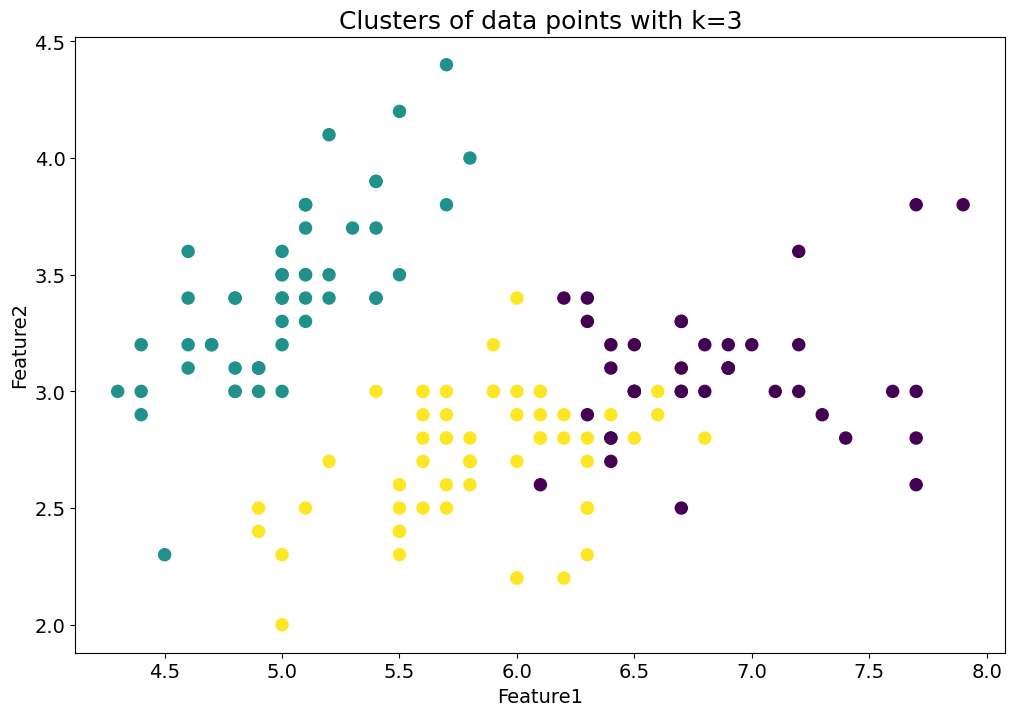

Silhouette Score of the final model with k=3: 0.55


In [ ]:
# Load the data
data = pd.read_csv('/content/drive/MyDrive/Dataset/Week1_Ex3.csv', names=['Feature1', 'Feature2', 'Feature3','Feature4'])

# Based on the Elbow method and Silhouette score, choose the optimal number of clusters
optimal_k = 3  # Replace with the optimal number based on your observations

# Perform K-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(data)

# Add the cluster labels to the dataset
data['Cluster'] = kmeans.labels_

# Visualize the clusters (if the data is 2D or can be reduced to 2D)
# Replace 'Feature1' and 'Feature2' with your actual feature column names
plt.figure(figsize=(12, 8))
plt.scatter(data['Feature1'], data['Feature2'], c=data['Cluster'], cmap='viridis',s=75)
plt.title(f'Clusters of data points with k={optimal_k}',fontsize=common_font_size + 4)
plt.xlabel('Feature1',fontsize=common_font_size)
plt.ylabel('Feature2',fontsize=common_font_size)
plt.xticks(fontsize=common_font_size)
plt.yticks(fontsize=common_font_size)
plt.savefig('Clusters.jpeg', bbox_inches='tight',dpi=600)
plt.show()

# Display the Silhouette score of the final model
final_silhouette_score = silhouette_score(data.iloc[:, :-1], data['Cluster'])  # Exclude the 'Cluster' column
print(f'Silhouette Score of the final model with k={optimal_k}: {final_silhouette_score:.2f}')

#1(d) Anomaly Detection

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import multivariate_normal
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Load the data (replace with your actual dataset)
# For this example, let's generate a sample dataset
np.random.seed(0)
data = np.random.randn(300, 2)  # 300 samples, 2 features

# Add some anomalies
data = np.concatenate([data, np.random.uniform(low=-4, high=6, size=(20, 2))], axis=0)

# Fit a Gaussian distribution to the dataset
mu = data.mean(axis=0)
sigma = np.cov(data.T)

# Calculate the probability density for each example
p = multivariate_normal(mean=mu, cov=sigma)
probability_density = p.pdf(data)

# Choose a threshold for flagging an anomaly
# This threshold can be set based on a validation set, or through cross-validation
threshold = 0.01 # This is an example value, you should select it based on your specific dataset

# Flag an anomaly if the probability density is less than the threshold
anomalies = data[probability_density < threshold]

# Print the number of anomalies detected
print(f'Number of anomalies detected: {len(anomalies)}')

# Construct true labels
# Assuming the last 20 entries are anomalies (as added in the data generation step)
true_labels = np.zeros(data.shape[0])
true_labels[-20:] = 1  # Mark the last 20 as anomalies

# Generate predicted labels based on the threshold
predicted_labels = (probability_density < threshold).astype(int)

# Classification metrics
print("\nClassification Report:")
print(classification_report(true_labels, predicted_labels))

print("Confusion Matrix:")
print(confusion_matrix(true_labels, predicted_labels))


Number of anomalies detected: 23

Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      0.97      0.97       300
         1.0       0.61      0.70      0.65        20

    accuracy                           0.95       320
   macro avg       0.79      0.83      0.81       320
weighted avg       0.96      0.95      0.95       320

Confusion Matrix:
[[291   9]
 [  6  14]]


In [ ]:
data

array([[ 1.76405235e+00,  4.00157208e-01],
       [ 9.78737984e-01,  2.24089320e+00],
       [ 1.86755799e+00, -9.77277880e-01],
       [ 9.50088418e-01, -1.51357208e-01],
       [-1.03218852e-01,  4.10598502e-01],
       [ 1.44043571e-01,  1.45427351e+00],
       [ 7.61037725e-01,  1.21675016e-01],
       [ 4.43863233e-01,  3.33674327e-01],
       [ 1.49407907e+00, -2.05158264e-01],
       [ 3.13067702e-01, -8.54095739e-01],
       [-2.55298982e+00,  6.53618595e-01],
       [ 8.64436199e-01, -7.42165020e-01],
       [ 2.26975462e+00, -1.45436567e+00],
       [ 4.57585173e-02, -1.87183850e-01],
       [ 1.53277921e+00,  1.46935877e+00],
       [ 1.54947426e-01,  3.78162520e-01],
       [-8.87785748e-01, -1.98079647e+00],
       [-3.47912149e-01,  1.56348969e-01],
       [ 1.23029068e+00,  1.20237985e+00],
       [-3.87326817e-01, -3.02302751e-01],
       [-1.04855297e+00, -1.42001794e+00],
       [-1.70627019e+00,  1.95077540e+00],
       [-5.09652182e-01, -4.38074302e-01],
       [-1.

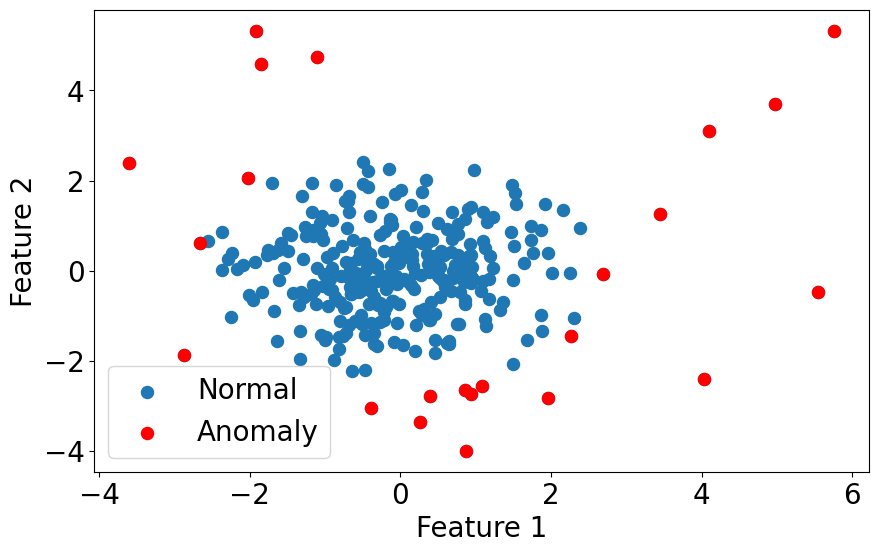

In [ ]:
# Set common font size
common_font_size = 20

# Visualize the results
plt.figure(figsize=(10, 6))
plt.scatter(data[:,0], data[:,1], label='Normal',s=75)
plt.scatter(anomalies[:,0], anomalies[:,1], color='r', label='Anomaly',s=75)
plt.xlabel('Feature 1', fontsize=common_font_size)
plt.ylabel('Feature 2',fontsize=common_font_size)
plt.xticks(fontsize=common_font_size)
plt.yticks(fontsize=common_font_size)
plt.legend(fontsize=common_font_size)
plt.savefig('Anomalies.jpeg', bbox_inches='tight',dpi=600)
plt.show()